In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
Car_dataset = pd.read_csv('car data.csv')

In [3]:
Car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
Car_dataset.shape # It is to check number of rows and columns

(301, 9)

In [5]:
Car_dataset.info() # to get info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# To check number of missing value

Car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
# For checking the distribution of categorical data
print(Car_dataset.Car_Name.value_counts())
print(Car_dataset.Fuel_Type.value_counts())
print(Car_dataset.Selling_type.value_counts())
print(Car_dataset.Transmission.value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [8]:
# Encoding the categorical data

# encoding "Fuel_Type" Column
Car_dataset.replace({'Fuel_Type':
    {
        'Petrol': 0,
        'Diesel': 1,
        'CNG': 2
    }
}, inplace=True)


# encoding "Selling_type" Column
Car_dataset.replace({'Selling_type':
    {
        'Dealer': 0,
        'Individual': 1
    }
}, inplace=True)



# encoding "Transmission" Column
Car_dataset.replace({'Transmission':
    {
        'Manual': 0,
        'Automatic': 1
    }
}, inplace=True)

In [9]:
Car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
# Now data get split into Training and Test Data 

x = Car_dataset.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = Car_dataset['Selling_Price']

In [11]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission   
0    2014           5.59       27000          0             0             0  \
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [12]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2)

In [14]:
# Training Model

In [15]:
# Applying LinearRegression

LR_M = LinearRegression()

In [16]:
LR_M.fit(x_train, y_train)

LinearRegression()

In [17]:
# Now Evaluation of the model 

In [18]:
training_data_predict = LR_M.predict(x_train)

In [19]:
error_score = metrics.r2_score(y_train, training_data_predict)
print("R Square Error : ", error_score)

R Square Error :  0.8796483009370217


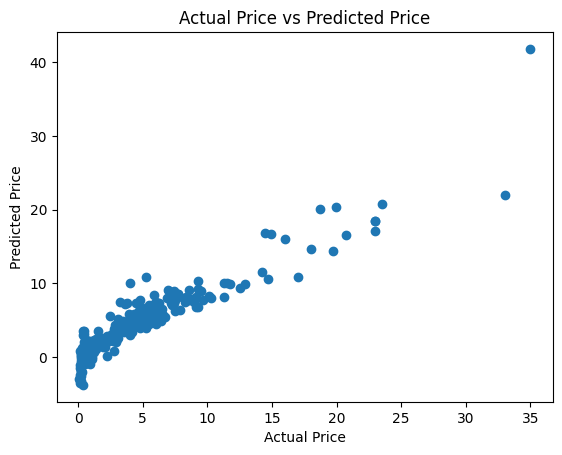

In [20]:
# For Visualization of the Actual Prices and Predicted Prices
plt.scatter(y_train, training_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [21]:
# Prediction on Training Data 
test_data_predict = LR_M.predict(x_test)

In [22]:
error_score = metrics.r2_score(y_test, test_data_predict)
print("R Square Error : ", error_score)

R Square Error :  0.8365861023209662


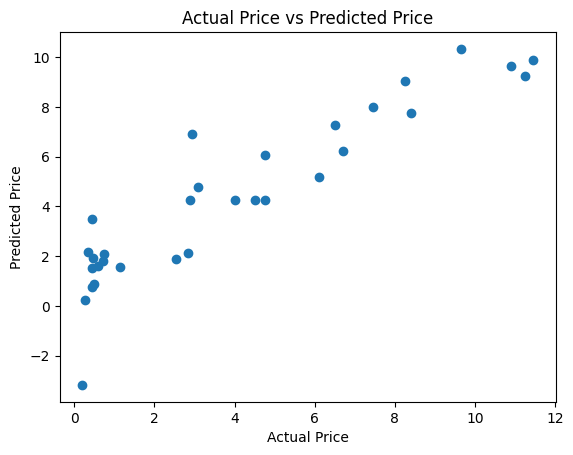

In [23]:
# For Visualization of the Actual Prices and Predicted Prices
plt.scatter(y_test, test_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()